In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz


In [2]:
original_vacancy = pd.read_excel("../data/vacancy main info.xlsx")
original_vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  889 non-null    int64 
 1   Name                889 non-null    object
 2   Url to Vacancy      889 non-null    object
 3   Company             889 non-null    object
 4   Location            870 non-null    object
 5   Type of Employment  889 non-null    object
 6   Age category        44 non-null     object
 7   Education degree    414 non-null    object
 8   Salary              889 non-null    object
 9   Post Posting Date   882 non-null    object
 10  Post Deadline Date  882 non-null    object
dtypes: int64(1), object(10)
memory usage: 76.5+ KB


In [3]:
def merge_similar_strings(df, column):
    unique_strings = df[column].unique() 
    for string1 in unique_strings:
        for string2 in unique_strings:
            if string1 != string2 and fuzz.ratio(string1, string2) > 90: 
                df[column] = df[column].replace({string2: string1})  
    return df

In [4]:
original_vacancy.head()

,Id,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Post Posting Date,Post Deadline Date
0,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,19.03.2024,19.04.2024
1,2,React Native Developer,https://busy.az/vacancy/122877/react-native-de...,Air Group,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,19.03.2024,03.04.2024
2,3,IOS developer,https://busy.az/vacancy/122830/ios-developer,Bank Respublika ASC,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,19.03.2024,19.04.2024
3,4,iOS Developer (Swift UI),https://busy.az/vacancy/122828/ios-developer-s...,Bank Respublika ASC,Bakı,Tam ştat (full time),NaN,Ali (bakalavr),Razılaşma yolu ilə,18.03.2024,18.04.2024
4,5,Baş PL/SQL Developer,https://busy.az/vacancy/122680/bas-plsql-devel...,Ziraat Bank Azərbaycan,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,16.03.2024,16.04.2024


As we can see, only 44 from 889 vacancy has age category and 414 need some education degree

In [5]:
original_vacancy.describe(include='all').transpose().loc[:, 'top']

Id                                                            NaN
Name                                            Android Developer
Url to Vacancy        https://busy.az/vacancy/98258/php-developer
Company                                                PASHA Bank
Location                                                     Bakı
Type of Employment                           Tam ştat (full time)
Age category                                             25  - 45
Education degree                                              Ali
Salary                                         Razılaşma yolu ilə
Post Posting Date                                      03.07.2022
Post Deadline Date                                     03.08.2022
Name: top, dtype: object

In [6]:
original_vacancy_skills = pd.read_excel("../data/vacancy skills.xlsx")
original_vacancy_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      4572 non-null   int64 
 1   All Tags                4498 non-null   object
 2   All Vacancy Alter Name  4570 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.3+ KB


In [7]:
original_vacancy_skills.head()

,Id,All Tags,All Vacancy Alter Name
0,1,JavaScript,proqramçı
1,1,Figma,programmer
2,1,software development,software developer
3,1,programming,proqram təminatçısı
4,2,software development,mobile application developer


In [8]:
top_values = original_vacancy_skills.describe(include='all').transpose().loc[:, 'top']
top_values

Id                                         NaN
All Tags                  software development
All Vacancy Alter Name      software developer
Name: top, dtype: object

In [9]:
vacancy_df = pd.DataFrame(original_vacancy)
skills_df = pd.DataFrame(original_vacancy_skills)
merged_df = pd.merge(vacancy_df, skills_df, on='Id')
merged_df[['Post Posting Date', 'Post Deadline Date']] = merged_df[['Post Posting Date', 'Post Deadline Date']].apply(pd.to_datetime, dayfirst=True)
merged_df['Location'] = merged_df['Location'].astype(str)

merged_df

,Id,Name,Url to Vacancy,Company,Location,Type of Employment,Age category,Education degree,Salary,Post Posting Date,Post Deadline Date,All Tags,All Vacancy Alter Name
0,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,JavaScript,proqramçı
1,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,Figma,programmer
2,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,software development,software developer
3,1,QA Intern – Functional Testing,https://busy.az/vacancy/122893/qa-intern-funct...,a1qa,Bakı,Tam ştat (full time),25 - 45,Ali,Razılaşma yolu ilə,2024-03-19,2024-04-19,programming,proqram təminatçısı
4,2,React Native Developer,https://busy.az/vacancy/122877/react-native-de...,Air Group,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2024-03-19,2024-04-03,software development,mobile application developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,software development,proqramçı
4568,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,proqram təminatı,software developer
4569,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,proqramlaşdırma,proqram təminatçısı
4570,889,Kiber Nüfuzetmə mütəxəssisi - Pentester,https://busy.az/vacancy/77833/kiber-nufuzetme-...,Xalq Bank,Bakı,Tam ştat (full time),NaN,NaN,Razılaşma yolu ilə,2021-12-13,2022-01-13,программирование,NaN


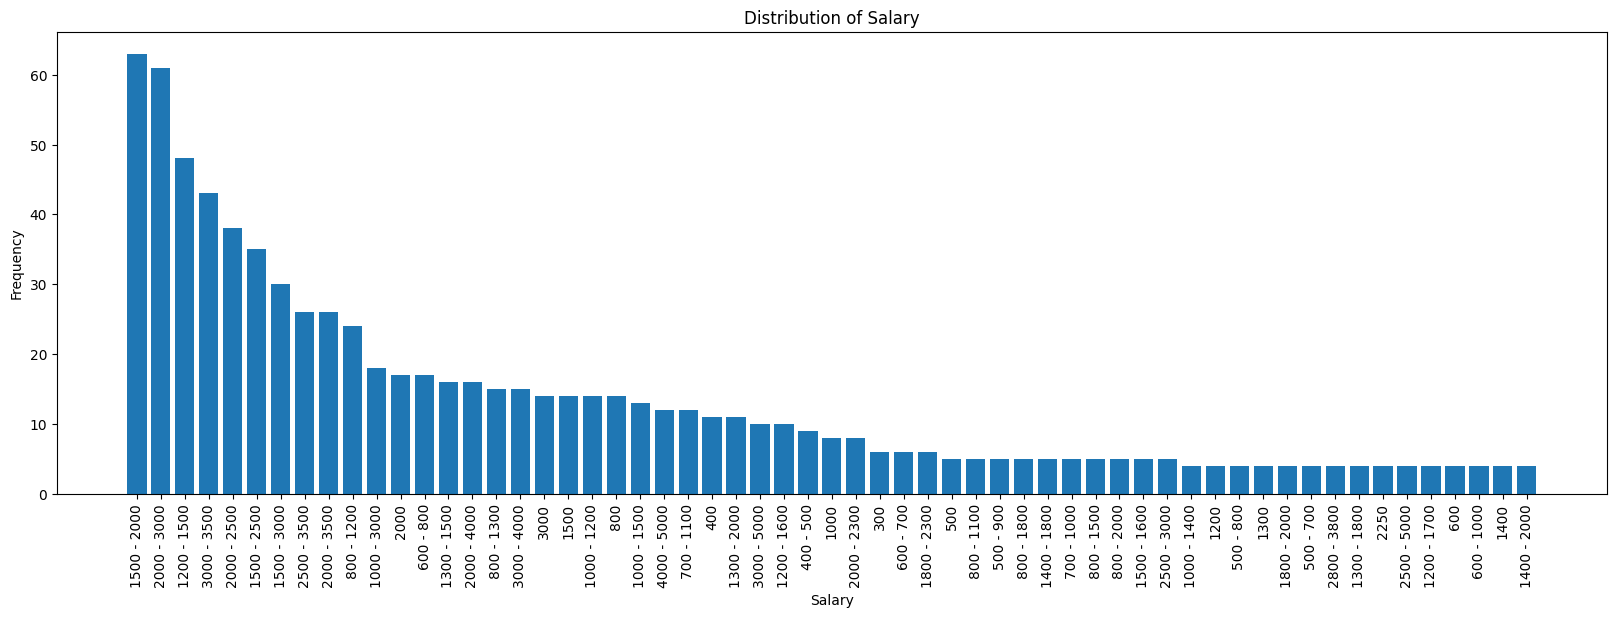

In [10]:
salary_counts =  merged_df['Salary'].where(merged_df['Salary'] != 'Razılaşma yolu ilə').value_counts()

plt.figure(figsize=(20,6))
plt.bar(salary_counts.index, salary_counts.values)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.xticks(rotation=90)

plt.show()

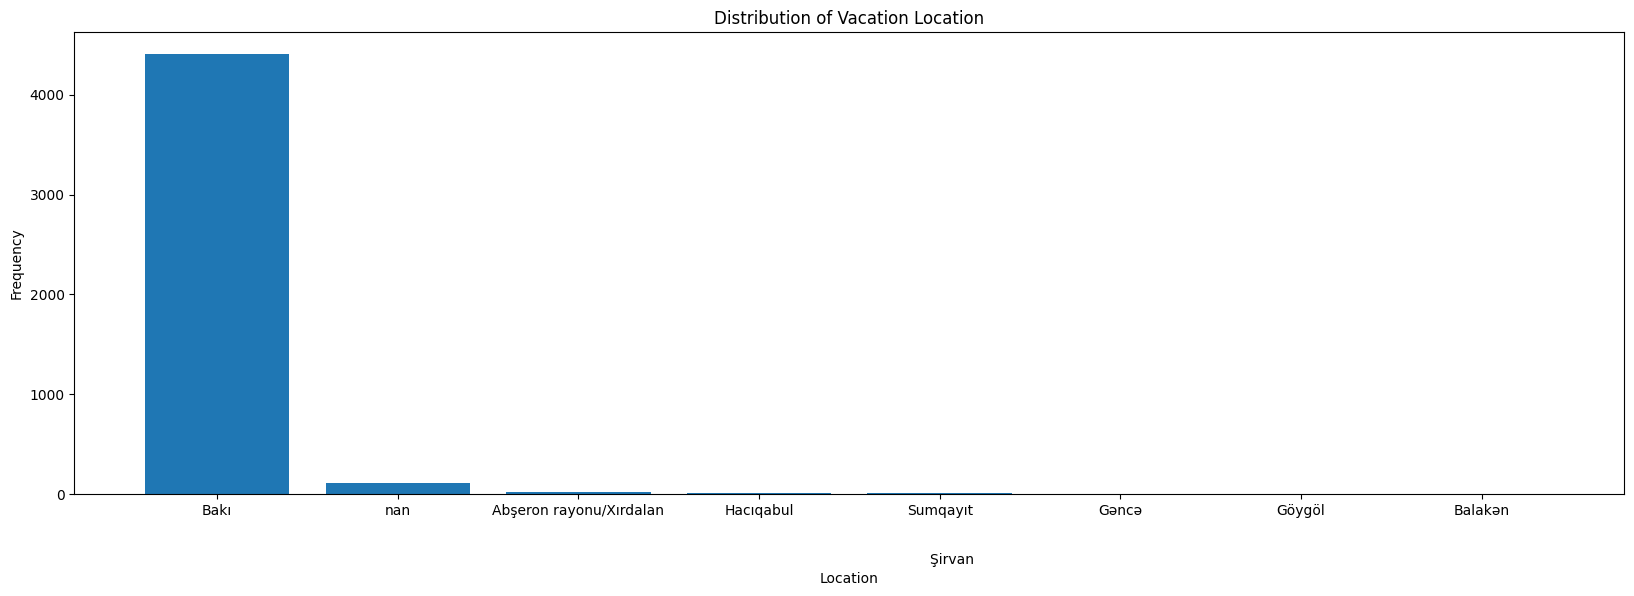

In [11]:
merged_df_without_repeat_location = merge_similar_strings(merged_df, "Location")
location_counts =  merged_df_without_repeat_location['Location'].dropna().value_counts()

plt.figure(figsize=(20,6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Distribution of Vacation Location')

plt.show()

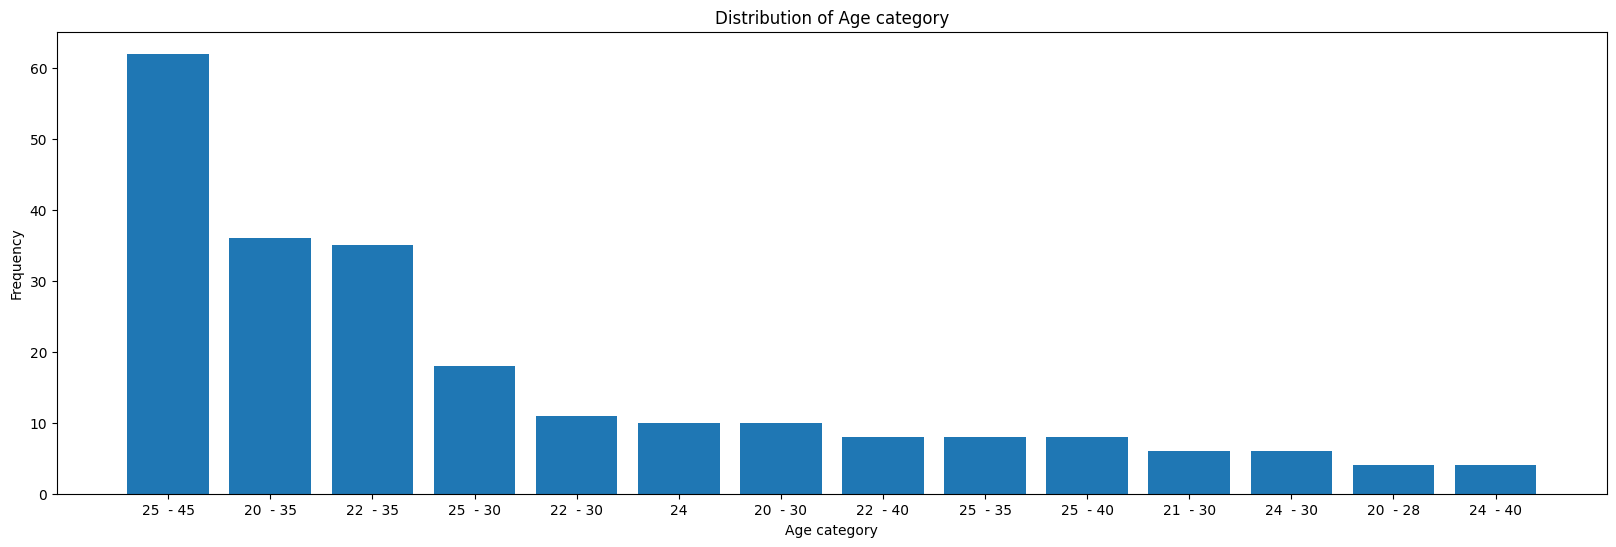

In [12]:
age_category_count =  merged_df['Age category'].dropna().value_counts()

plt.figure(figsize=(20,6))
plt.bar(age_category_count.index, age_category_count.values)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Distribution of Age category')

plt.show()

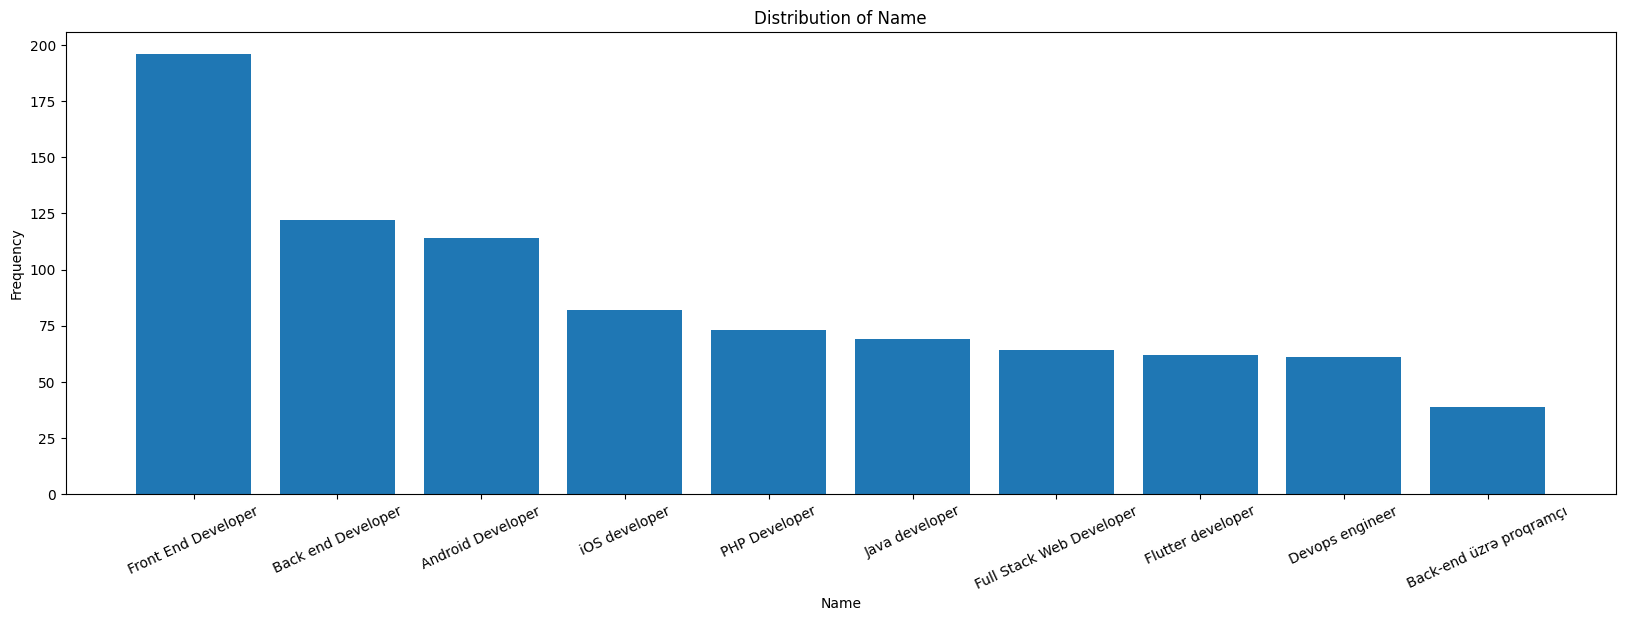

In [13]:
merged_df_without_repeat_name = merge_similar_strings(merged_df, 'Name')
vacancy_name_count = merged_df_without_repeat_name['Name'].where(merged_df_without_repeat_name['Name'].str.len() < 25).value_counts()[:10]

plt.figure(figsize=(20,6))
plt.bar(vacancy_name_count.index, vacancy_name_count.values)
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.title('Distribution of Name')
plt.xticks(rotation= 25 ,fontsize=10)
plt.show()